# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

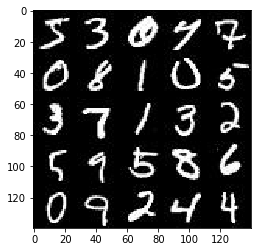

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

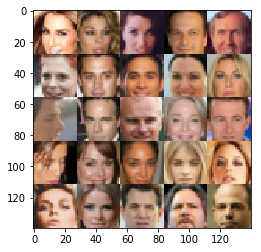

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\Jorge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, name='lr')

    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2*x1, x1)
        ## 14x14x32
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2*bn2,bn2)
        ## 7x7x64
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2*bn3, bn3)
        #print(relu3.shape)
        
        flat = tf.reshape(relu3, (-1, 4*4*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    ## no reuse parameter, then Not is_train
    with tf.variable_scope('generator', reuse=not is_train):
        
        #first fully connected
        x1 = tf.layers.dense(z, 2*2*128)
        
        x1 = tf.reshape(x1, (-1, 2, 2, 128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2*x1,x1)
        
        ##print(x1.shape)
        
        #same padding  4x4
        #valid padding 7x7
        x2 = tf.layers.conv2d_transpose(x1, 64,5,strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2*x2, x2)
        ##print(x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2*x3, x3)
        ##print(x3.shape)
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        
        out = tf.tanh(logits)
        ##print(out.shape)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_real,
                                                                           labels = tf.ones_like(d_model_real)
                                                                         )
                                )
    d_loss_fake = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits= d_logits_fake,
                                                                           labels = tf.zeros_like(d_model_fake)
                                                                         )
                                )
    g_loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_fake,
                                                                      labels= tf.ones_like(d_model_fake)
                                                                    )
                           )
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [ ]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    ##saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    
    samples, losses = [], []
    steps = 0
    
    print_every = 10
    show_every = 100
    
    ##-----Model Inputs-----##
    inputs_real, inputs_z, lrt = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    ##-----Model Loss-------##
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    ##-----Model Opt--------##
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                ##rescale
                batch_images = (batch_images*2)-1
                
                #noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real:batch_images ,inputs_z: batch_z, lrt:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z:batch_z, inputs_real:batch_images, lrt:learning_rate})
                
                if steps%print_every == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real:batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps%show_every == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                    
                    '''
            saver.save(sess, './checkpoints/generator.ckpt')
        with open('samples.pkl', 'wb') as f:
            pkl.dump(samples, f)        
                    '''
                    
            
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/3... Discriminator Loss: 0.2689... Generator Loss: 1.8481
Epoch 1/3... Discriminator Loss: 0.1973... Generator Loss: 2.0952
Epoch 1/3... Discriminator Loss: 0.1028... Generator Loss: 2.6409
Epoch 1/3... Discriminator Loss: 0.0830... Generator Loss: 2.9476
Epoch 1/3... Discriminator Loss: 0.0488... Generator Loss: 3.3375
Epoch 1/3... Discriminator Loss: 0.0327... Generator Loss: 3.7514
Epoch 1/3... Discriminator Loss: 0.0273... Generator Loss: 4.0120
Epoch 1/3... Discriminator Loss: 0.0323... Generator Loss: 3.7232
Epoch 1/3... Discriminator Loss: 0.0325... Generator Loss: 3.7812
Epoch 1/3... Discriminator Loss: 0.0380... Generator Loss: 3.6680


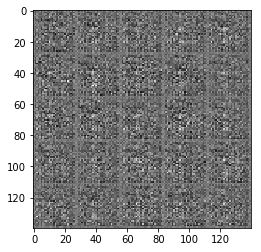

Epoch 1/3... Discriminator Loss: 0.0394... Generator Loss: 3.6693
Epoch 1/3... Discriminator Loss: 0.0335... Generator Loss: 4.0239
Epoch 1/3... Discriminator Loss: 0.0263... Generator Loss: 4.0856
Epoch 1/3... Discriminator Loss: 0.0248... Generator Loss: 4.1247
Epoch 1/3... Discriminator Loss: 0.0329... Generator Loss: 4.0392
Epoch 1/3... Discriminator Loss: 0.0388... Generator Loss: 3.6218
Epoch 1/3... Discriminator Loss: 0.0445... Generator Loss: 3.5163
Epoch 1/3... Discriminator Loss: 0.0530... Generator Loss: 3.6335
Epoch 1/3... Discriminator Loss: 0.0571... Generator Loss: 3.6280
Epoch 1/3... Discriminator Loss: 0.0703... Generator Loss: 3.1765


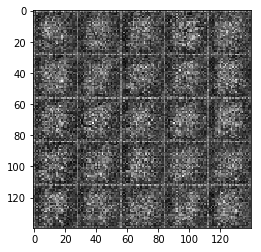

Epoch 1/3... Discriminator Loss: 0.0623... Generator Loss: 3.3804
Epoch 1/3... Discriminator Loss: 0.0724... Generator Loss: 3.8214
Epoch 1/3... Discriminator Loss: 0.0632... Generator Loss: 3.0156
Epoch 1/3... Discriminator Loss: 0.1174... Generator Loss: 2.7857
Epoch 1/3... Discriminator Loss: 0.1404... Generator Loss: 2.6191
Epoch 1/3... Discriminator Loss: 0.0737... Generator Loss: 3.6052
Epoch 1/3... Discriminator Loss: 0.1280... Generator Loss: 5.8158
Epoch 1/3... Discriminator Loss: 0.1027... Generator Loss: 2.8612
Epoch 1/3... Discriminator Loss: 0.0779... Generator Loss: 3.1289
Epoch 1/3... Discriminator Loss: 0.0302... Generator Loss: 4.3073


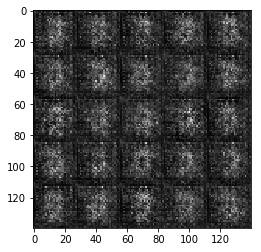

Epoch 1/3... Discriminator Loss: 0.0343... Generator Loss: 4.1767
Epoch 1/3... Discriminator Loss: 0.0260... Generator Loss: 4.4031
Epoch 1/3... Discriminator Loss: 0.0205... Generator Loss: 4.7192
Epoch 1/3... Discriminator Loss: 0.0206... Generator Loss: 4.6412
Epoch 1/3... Discriminator Loss: 0.0163... Generator Loss: 4.6601
Epoch 1/3... Discriminator Loss: 0.0135... Generator Loss: 5.2540
Epoch 1/3... Discriminator Loss: 0.0142... Generator Loss: 4.9506
Epoch 1/3... Discriminator Loss: 0.0221... Generator Loss: 4.5526
Epoch 1/3... Discriminator Loss: 0.0132... Generator Loss: 4.7103
Epoch 1/3... Discriminator Loss: 0.0160... Generator Loss: 4.8669


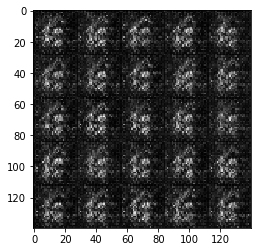

Epoch 1/3... Discriminator Loss: 0.0085... Generator Loss: 5.5800
Epoch 1/3... Discriminator Loss: 0.0101... Generator Loss: 5.1178
Epoch 1/3... Discriminator Loss: 0.0092... Generator Loss: 5.3909
Epoch 1/3... Discriminator Loss: 0.0165... Generator Loss: 4.9012
Epoch 1/3... Discriminator Loss: 0.0060... Generator Loss: 5.7177
Epoch 1/3... Discriminator Loss: 0.0066... Generator Loss: 5.5293
Epoch 1/3... Discriminator Loss: 0.0072... Generator Loss: 5.3177
Epoch 1/3... Discriminator Loss: 0.0080... Generator Loss: 5.6238
Epoch 1/3... Discriminator Loss: 0.0069... Generator Loss: 6.0347
Epoch 1/3... Discriminator Loss: 0.0067... Generator Loss: 5.6408


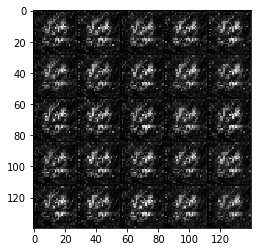

Epoch 1/3... Discriminator Loss: 0.0072... Generator Loss: 5.5583
Epoch 1/3... Discriminator Loss: 0.0066... Generator Loss: 5.5543
Epoch 1/3... Discriminator Loss: 0.0091... Generator Loss: 5.4034
Epoch 1/3... Discriminator Loss: 0.0047... Generator Loss: 6.1434
Epoch 1/3... Discriminator Loss: 0.0069... Generator Loss: 5.7006
Epoch 1/3... Discriminator Loss: 0.0060... Generator Loss: 5.7672
Epoch 1/3... Discriminator Loss: 0.0057... Generator Loss: 6.1798
Epoch 1/3... Discriminator Loss: 0.0038... Generator Loss: 6.1840
Epoch 1/3... Discriminator Loss: 0.0024... Generator Loss: 6.3911
Epoch 1/3... Discriminator Loss: 0.0056... Generator Loss: 5.9200


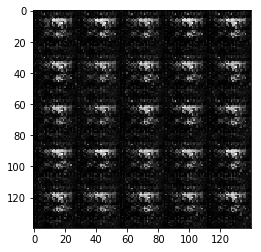

Epoch 1/3... Discriminator Loss: 0.0026... Generator Loss: 6.4238
Epoch 1/3... Discriminator Loss: 0.0023... Generator Loss: 6.3740
Epoch 1/3... Discriminator Loss: 0.0019... Generator Loss: 6.6989
Epoch 1/3... Discriminator Loss: 0.0030... Generator Loss: 6.4180
Epoch 1/3... Discriminator Loss: 0.0031... Generator Loss: 6.4006
Epoch 1/3... Discriminator Loss: 0.0033... Generator Loss: 6.1173
Epoch 1/3... Discriminator Loss: 0.0020... Generator Loss: 6.7290
Epoch 1/3... Discriminator Loss: 0.0057... Generator Loss: 6.2243
Epoch 1/3... Discriminator Loss: 0.1701... Generator Loss: 1.8902
Epoch 1/3... Discriminator Loss: 0.0028... Generator Loss: 10.7254


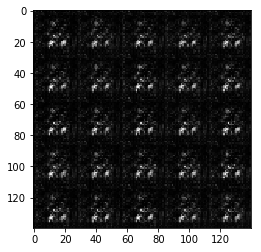

Epoch 1/3... Discriminator Loss: 0.0207... Generator Loss: 4.1750
Epoch 1/3... Discriminator Loss: 0.0439... Generator Loss: 3.9474
Epoch 1/3... Discriminator Loss: 0.0462... Generator Loss: 3.9122
Epoch 1/3... Discriminator Loss: 0.0215... Generator Loss: 4.5172
Epoch 1/3... Discriminator Loss: 0.0343... Generator Loss: 4.0536
Epoch 1/3... Discriminator Loss: 0.0249... Generator Loss: 4.6458
Epoch 1/3... Discriminator Loss: 0.0145... Generator Loss: 4.8889
Epoch 1/3... Discriminator Loss: 0.0218... Generator Loss: 4.6527
Epoch 1/3... Discriminator Loss: 0.0140... Generator Loss: 5.0582
Epoch 1/3... Discriminator Loss: 0.0137... Generator Loss: 4.9833


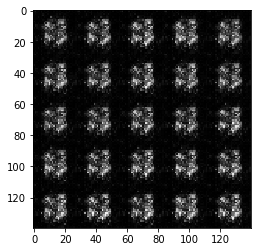

Epoch 1/3... Discriminator Loss: 0.0074... Generator Loss: 5.3377
Epoch 1/3... Discriminator Loss: 0.0098... Generator Loss: 5.2419
Epoch 1/3... Discriminator Loss: 0.0074... Generator Loss: 5.5724
Epoch 1/3... Discriminator Loss: 0.0087... Generator Loss: 5.4529
Epoch 1/3... Discriminator Loss: 0.0046... Generator Loss: 5.6447
Epoch 1/3... Discriminator Loss: 0.0057... Generator Loss: 5.6540
Epoch 1/3... Discriminator Loss: 0.0062... Generator Loss: 5.8262
Epoch 1/3... Discriminator Loss: 0.0058... Generator Loss: 5.8518
Epoch 1/3... Discriminator Loss: 0.0081... Generator Loss: 5.8284
Epoch 1/3... Discriminator Loss: 0.0048... Generator Loss: 5.8782


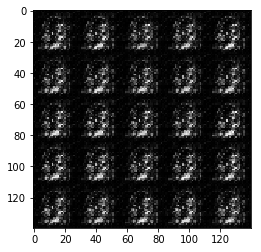

Epoch 1/3... Discriminator Loss: 0.0039... Generator Loss: 6.1281
Epoch 1/3... Discriminator Loss: 0.0041... Generator Loss: 6.3097
Epoch 1/3... Discriminator Loss: 0.0051... Generator Loss: 6.0800
Epoch 1/3... Discriminator Loss: 0.0034... Generator Loss: 6.1784
Epoch 1/3... Discriminator Loss: 0.0053... Generator Loss: 6.2117
Epoch 1/3... Discriminator Loss: 0.0056... Generator Loss: 5.8172
Epoch 1/3... Discriminator Loss: 0.0023... Generator Loss: 6.4441
Epoch 1/3... Discriminator Loss: 0.0027... Generator Loss: 6.7527
Epoch 1/3... Discriminator Loss: 0.0028... Generator Loss: 6.7783
Epoch 1/3... Discriminator Loss: 0.0024... Generator Loss: 6.6192


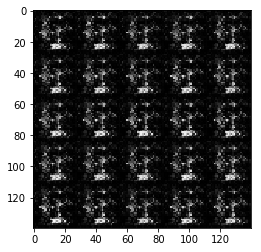

Epoch 1/3... Discriminator Loss: 0.0034... Generator Loss: 6.6038
Epoch 1/3... Discriminator Loss: 0.0017... Generator Loss: 6.7262
Epoch 1/3... Discriminator Loss: 0.0015... Generator Loss: 6.9085
Epoch 1/3... Discriminator Loss: 0.0015... Generator Loss: 6.7958
Epoch 1/3... Discriminator Loss: 0.0021... Generator Loss: 6.6635
Epoch 1/3... Discriminator Loss: 0.0028... Generator Loss: 6.5083
Epoch 1/3... Discriminator Loss: 0.0021... Generator Loss: 6.5540
Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 6.9361
Epoch 1/3... Discriminator Loss: 0.0018... Generator Loss: 6.9665
Epoch 1/3... Discriminator Loss: 0.0016... Generator Loss: 6.9423


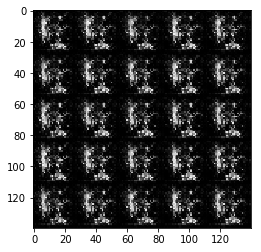

Epoch 1/3... Discriminator Loss: 0.0018... Generator Loss: 6.9727
Epoch 1/3... Discriminator Loss: 0.0053... Generator Loss: 6.9328
Epoch 1/3... Discriminator Loss: 0.0017... Generator Loss: 7.2001
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.3546
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.2943
Epoch 1/3... Discriminator Loss: 0.0012... Generator Loss: 7.3410
Epoch 1/3... Discriminator Loss: 0.0021... Generator Loss: 7.2240
Epoch 1/3... Discriminator Loss: 0.0011... Generator Loss: 7.3359
Epoch 1/3... Discriminator Loss: 0.0031... Generator Loss: 7.1879
Epoch 1/3... Discriminator Loss: 0.0012... Generator Loss: 7.1953


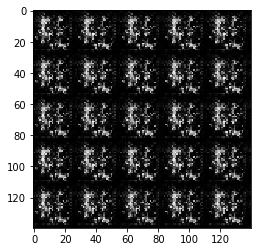

Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 7.1821
Epoch 1/3... Discriminator Loss: 0.0009... Generator Loss: 7.1674
Epoch 1/3... Discriminator Loss: 0.0009... Generator Loss: 7.2711
Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 6.9535
Epoch 1/3... Discriminator Loss: 0.0019... Generator Loss: 6.7732
Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 6.9070
Epoch 1/3... Discriminator Loss: 0.0016... Generator Loss: 7.0372
Epoch 1/3... Discriminator Loss: 0.0025... Generator Loss: 6.9388
Epoch 1/3... Discriminator Loss: 0.0011... Generator Loss: 7.0723
Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 7.1904


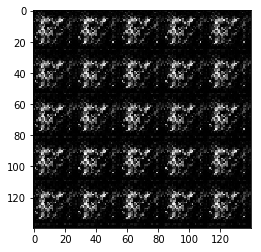

Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 7.2810
Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 7.2279
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.2384
Epoch 1/3... Discriminator Loss: 0.0008... Generator Loss: 7.3625
Epoch 1/3... Discriminator Loss: 0.0008... Generator Loss: 7.4422
Epoch 1/3... Discriminator Loss: 0.0006... Generator Loss: 7.5053
Epoch 1/3... Discriminator Loss: 0.0007... Generator Loss: 7.5091
Epoch 1/3... Discriminator Loss: 0.0007... Generator Loss: 7.5774
Epoch 1/3... Discriminator Loss: 0.0009... Generator Loss: 7.4838
Epoch 1/3... Discriminator Loss: 0.0009... Generator Loss: 7.3471


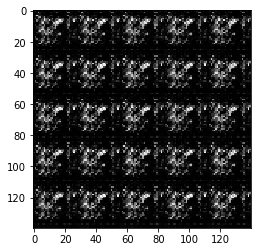

Epoch 1/3... Discriminator Loss: 0.0012... Generator Loss: 7.2216
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.1755
Epoch 1/3... Discriminator Loss: 0.0012... Generator Loss: 7.0878
Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 6.9145
Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 6.8887
Epoch 1/3... Discriminator Loss: 0.0011... Generator Loss: 6.9989
Epoch 1/3... Discriminator Loss: 0.0017... Generator Loss: 6.8652
Epoch 1/3... Discriminator Loss: 0.0015... Generator Loss: 6.8063
Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 6.9424
Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 6.8986


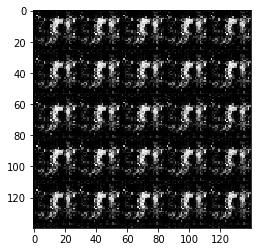

Epoch 1/3... Discriminator Loss: 0.0014... Generator Loss: 6.7772
Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 6.9121
Epoch 1/3... Discriminator Loss: 0.0015... Generator Loss: 6.7687
Epoch 1/3... Discriminator Loss: 0.0029... Generator Loss: 6.8379
Epoch 1/3... Discriminator Loss: 0.0011... Generator Loss: 6.9968
Epoch 1/3... Discriminator Loss: 0.0015... Generator Loss: 7.0984
Epoch 1/3... Discriminator Loss: 0.0013... Generator Loss: 7.2757
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.2867
Epoch 1/3... Discriminator Loss: 0.0007... Generator Loss: 7.3811
Epoch 1/3... Discriminator Loss: 0.0008... Generator Loss: 7.2181


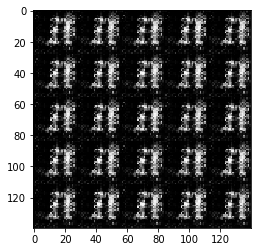

Epoch 1/3... Discriminator Loss: 0.0009... Generator Loss: 7.2895
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.4298
Epoch 1/3... Discriminator Loss: 0.0006... Generator Loss: 7.5651
Epoch 1/3... Discriminator Loss: 0.0007... Generator Loss: 7.5723
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.7665
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.8862
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.9348
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.8991
Epoch 1/3... Discriminator Loss: 0.0006... Generator Loss: 7.9425
Epoch 1/3... Discriminator Loss: 0.0004... Generator Loss: 7.9221


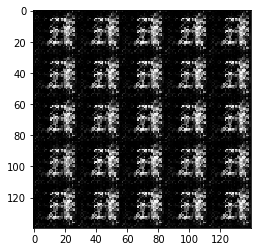

Epoch 1/3... Discriminator Loss: 0.0004... Generator Loss: 7.9488
Epoch 1/3... Discriminator Loss: 0.0004... Generator Loss: 7.9954
Epoch 1/3... Discriminator Loss: 0.0010... Generator Loss: 7.9202
Epoch 1/3... Discriminator Loss: 0.0006... Generator Loss: 7.7376
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.7726
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.8548
Epoch 1/3... Discriminator Loss: 0.0006... Generator Loss: 7.8226
Epoch 1/3... Discriminator Loss: 0.0007... Generator Loss: 7.8255
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.8241
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.8089


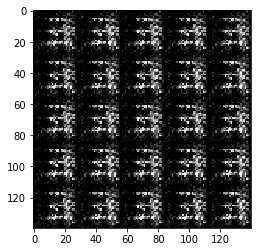

Epoch 1/3... Discriminator Loss: 0.0006... Generator Loss: 7.7834
Epoch 1/3... Discriminator Loss: 0.0007... Generator Loss: 7.8076
Epoch 1/3... Discriminator Loss: 0.0005... Generator Loss: 7.9084


In [ ]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3 #modified for better results

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3 #modified for better results

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.